In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


x = pd.read_csv(r'C:\Users\SriniAchuthan\Downloads\downloaded-file\features.csv');
print(x)
print(x.head())
print(x.columns)
print(x.shape)

      Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1  2010-02-05        42.31       2.572        NaN        NaN   
1         1  2010-02-12        38.51       2.548        NaN        NaN   
2         1  2010-02-19        39.93       2.514        NaN        NaN   
3         1  2010-02-26        46.63       2.561        NaN        NaN   
4         1  2010-03-05        46.50       2.625        NaN        NaN   
...     ...         ...          ...         ...        ...        ...   
8185     45  2013-06-28        76.05       3.639    4842.29     975.03   
8186     45  2013-07-05        77.50       3.614    9090.48    2268.58   
8187     45  2013-07-12        79.37       3.614    3789.94    1827.31   
8188     45  2013-07-19        82.84       3.737    2961.49    1047.07   
8189     45  2013-07-26        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0           NaN        NaN        

In [2]:
# Convert 'Date' to datetime
import datetime
x['Date'] = pd.to_datetime(x['Date'])

x['Date']

# Fill or drop missing values based on context

c = pd.DataFrame(x)
print("Original Dataframe:")
print(c)
print("New Cleaned Dataframe:")
c_cleaned = c.dropna()
print(c_cleaned)

Original Dataframe:
      Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1 2010-02-05        42.31       2.572        NaN        NaN   
1         1 2010-02-12        38.51       2.548        NaN        NaN   
2         1 2010-02-19        39.93       2.514        NaN        NaN   
3         1 2010-02-26        46.63       2.561        NaN        NaN   
4         1 2010-03-05        46.50       2.625        NaN        NaN   
...     ...        ...          ...         ...        ...        ...   
8185     45 2013-06-28        76.05       3.639    4842.29     975.03   
8186     45 2013-07-05        77.50       3.614    9090.48    2268.58   
8187     45 2013-07-12        79.37       3.614    3789.94    1827.31   
8188     45 2013-07-19        82.84       3.737    2961.49    1047.07   
8189     45 2013-07-26        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0           NaN        NaN

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64


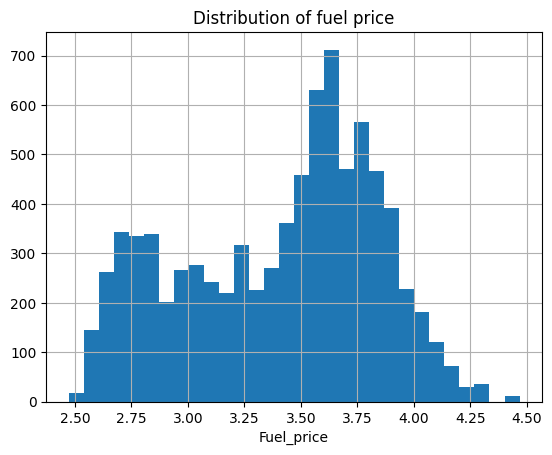

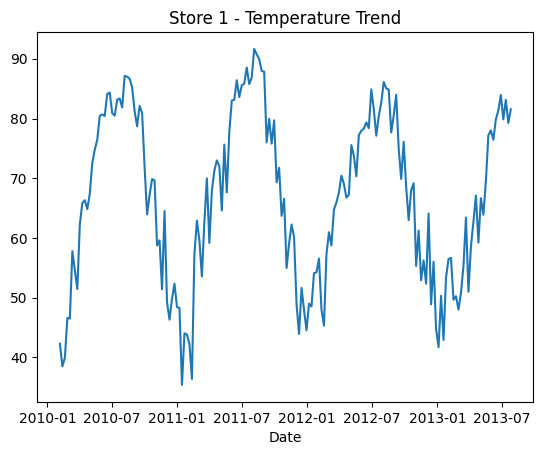

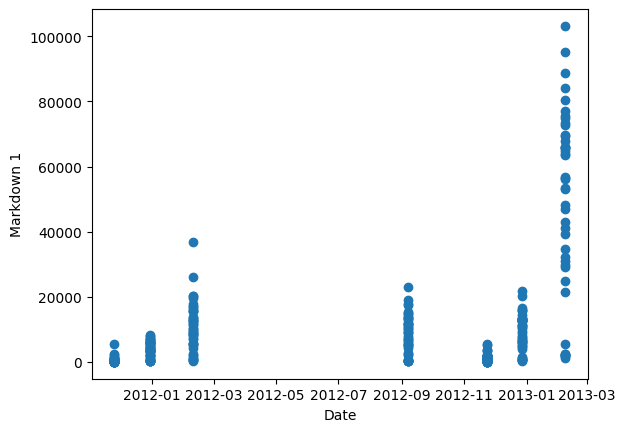

In [4]:
#Each data for a specific store in specific week
#Columns:Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
#CPI:Gently increases over time from 210 to above 225 , tracking inflation.
#Unemployment: Highest in 2010(8%) generally trends downwards into 6-7% range by 2013.
#IsHoliday: Mostly False;True during US shopping weeks:Thanksgiving , Christmas, New Years

#Histogram of fuel price
print(c.isna().sum())
x['Fuel_Price'].hist(bins=30)
plt.title('Distribution of fuel price')
plt.xlabel('Fuel_price')
plt.show()

#Temperature over time one store example
store1 = x[x['Store'] == 1]
plt.plot(store1['Date'],store1['Temperature'])
plt.title('Store 1 - Temperature Trend')
plt.xlabel('Date')
plt.show()

#Markdown5 over time , highlight holidays
holiday = x[x['IsHoliday'] == True]
plt.scatter(holiday['Date'],holiday['MarkDown1'])
plt.xlabel('Date')
plt.ylabel('Markdown 1')
plt.show()


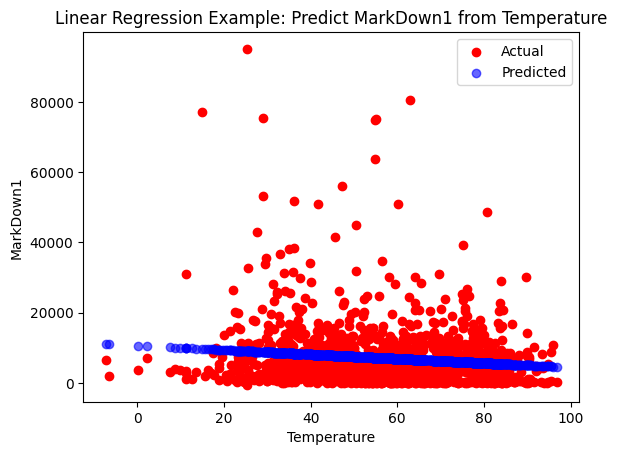

Coefficient: -62.11433947654522
Intercept: 10621.355287168346
R2 Score on test set: 0.018610800300623898


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(r'C:\Users\SriniAchuthan\Downloads\downloaded-file\features.csv')

# Pick only rows where MarkDown1 is not NA
df_filtered = df.dropna(subset=['MarkDown1'])

# Feature and target for example: Temperature (X), MarkDown1 (y)
X = df_filtered[['Temperature']]
y = df_filtered['MarkDown1']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Fit linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Plot
plt.scatter(X_test, y_test, color="red", label="Actual")
plt.scatter(X_test, y_pred, color="blue", alpha=0.6, label="Predicted")
plt.xlabel("Temperature")
plt.ylabel("MarkDown1")
plt.legend()
plt.title("Linear Regression Example: Predict MarkDown1 from Temperature")
plt.show()

# Print model coefficient and intercept
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)
print("R2 Score on test set:", model.score(X_test, y_test))


In [ ]:
#The CSV contains time-series weekly features for multiple stores , covering data from early 2010 to late 2013. 
#Each row represents a single store in a given week, with data on weather , fuel prices , markdown events ,economic factors and holidays. 
#The main variables are store,date,temperature , fuel price  , MarkDown1-MarkDown5 , CPI , Unemployement , IsHoliday.
#Store: Store Identifier(integer , many unique stores)
#Date : WeekDate(spanning over 3 years)
#Temperature: Recorded in Fahrenheit
#CPI: Consumer Price Index for the area
#Unemployment: Local Unemployment Rate
#IsHoliday: Boolean;identifies holiday weeks

#Markdown values are frequently 'NA' in 2010 and most of 2011 but became prevalent starting around late 2011.
#Markdown1-Markdown5 capture promotional activity.These fields are likely tied to major shopping holidays(e.g.Thanksgiving,Christmas,Black Friday) 
#with repeated spikes during holiday weeks.

#Unemployment: Store-level unemployement rates range between 3.9 percent and 14 percent wwith higher rates 
#in certain regions and timeframes,consistent with post-2008 recession trends in USA.

#CPI varies significantly by store , reflecting different regional price levels  